In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [33]:
Data = load_iris()


In [34]:
df = pd.DataFrame(Data.data,columns=Data.feature_names)

In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
df.drop(['petal length (cm)','petal width (cm)'],inplace=True,axis=1)

In [37]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [38]:
df['target'] = Data.target


In [39]:
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [40]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [41]:
df0

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [42]:
knn = range(1,10)
sse=[]
for i in knn:
    km=KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)
sse    

[230.47526666666667,
 91.59281914893619,
 53.90128282828283,
 47.235186438211656,
 32.105017424242426,
 24.83105800865801,
 22.079096488281834,
 18.383844396344394,
 16.984868131868133]

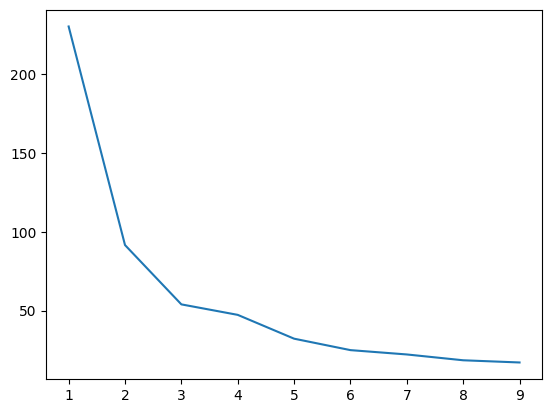

In [43]:
plt.plot(knn,sse)
plt.show()

In [44]:
X=df[['sepal length (cm)',	'sepal width (cm)']]
y=df.target

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X_test)
y_predicted

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 2])

In [49]:
km.score(X_test,y_test)

-7.719186813186812

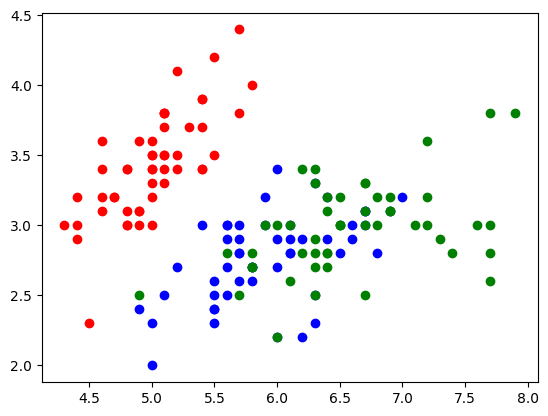

In [51]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],c='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],c='green')
plt.show()
